# Google Earth Engine Tutorial

Welcome to my little Google Earth Engine walkthrough. We'll go through some of the basic API features, as well as look at some of my helper function.

## Setup
The first step is to set up the GEE environment.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
https://earthengine.googleapis.com/api/download?docid=9441e709dc26afad6ff24325e67b5ffc&token=454bb78338cb35d67e2f6af2a4d1c7a9


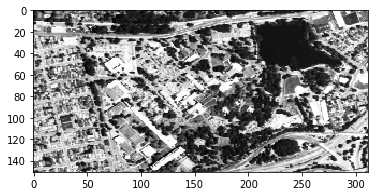

In [302]:
# Tell Jupyter to show images in this browser window Matlab style instead of popping out
%matplotlib inline

# debugging flags. Reloads include files every execution.
%load_ext autoreload 
%autoreload 2

import pprint
pp = pprint.PrettyPrinter(indent=4)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ee
import numpy as np

# Import the Google Earth Engine Library
from gee_library import *

# This command initializes the library and connects to Google's servers.
ee.Initialize()

# Now we'll load up some satelite imagery of Monterey.
# Don't worry too much about the details; just make sure an image appears below to confirm
# that your installation is working.
nps_bounds = bound_geometry(
                        (-121.880742, 36.600885),
                        (-121.866788, 36.594170))
tiles = img_at_region(ee.ImageCollection('USDA/NAIP/DOQQ'), 5, 'R', nps_bounds)
plt.imshow(tiles[0], cmap='gray')
plt.show()


In [287]:
monterey = (-121.9, 36.6)

california_bounds = bound_geometry(
                        (-121.931910, 36.618839),
                        (-121.920505, 36.608979)
                    )


nps_bounds = bound_geometry(
                        (-121.880742, 36.600885),
                        (-121.866788, 36.594170)
                    )


maps_collection = ee.ImageCollection('USDA/NAIP/DOQQ')

monterey_collection = maps_collection.filterBounds(nps_bounds)

available_bands(monterey_collection)

image_size_at_resolution(nps_bounds, 3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
'R' available in 13 images. (100%)
'G' available in 13 images. (100%)
'B' available in 13 images. (100%)
'N' available in 13 images. (100%)


{'height': 248.3901186998628, 'width': 416.2128462388699}

https://earthengine.googleapis.com/api/download?docid=2d1944d89e1e131b291c334d692485df&token=a70ed5a9096cc5d5f94a218835ee1084
(250, 519)


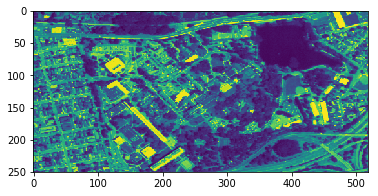

(250, 519)


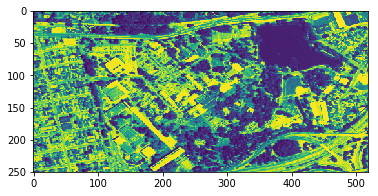

(250, 519)


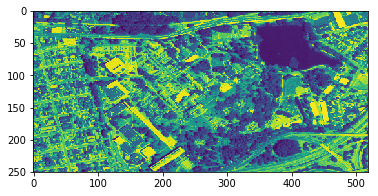

In [288]:
tiles = img_at_region(monterey_collection, 3, ['R','G','B'], nps_bounds)

for t in tiles.values():
    img=mpimg.imread(t)
    print np.array(img).shape
    
    plt.imshow(img)
    plt.show()

    